In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import itertools
import os, stat, time
from os.path import dirname as up
import shutil
import glob
from PIL import Image

In [10]:
from glob import glob
data = glob('/kaggle/input/breast-histopathology-images/**/*.png', recursive=True)

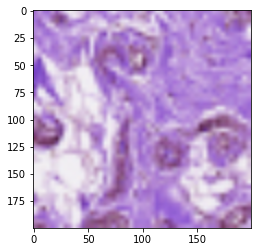

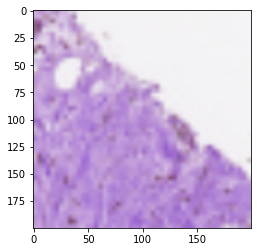

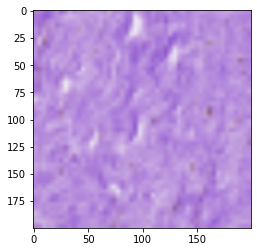

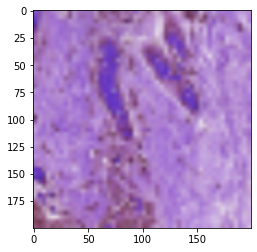

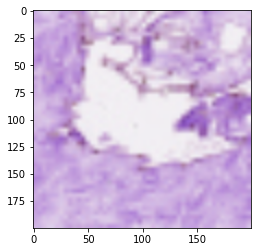

In [11]:
import cv2
import matplotlib.pyplot as plt
for i in data[:5]:
    img=cv2.imread(i)
    img_1=cv2.resize(img,(200,200))
    plt.imshow(img_1,cmap='binary')
    plt.show()

In [12]:
images=[]
labels=[]
for i in data[:15000]:
    if i.endswith('.png'):
        label=i[-5]
        img=cv2.imread(i)
        img_1=cv2.resize(img,(100,100))
        images.append(img_1)
        labels.append(label)

In [13]:
x=np.stack(images)

In [14]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(labels)

In [15]:
#normalize the data
x=x/255

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [17]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
def modelEfficientNetB0():
    
    model = models.Sequential()
    model.add(EfficientNetB0(include_top = False, weights = "imagenet",
                            input_shape=(100,100, 3)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(2, activation = "sigmoid"))
    
    return model 
model = modelEfficientNetB0()
model.summary()

16711680/16705208 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 4, 4, 1280)        4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________


In [18]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc'])

In [19]:
history=model.fit(x,y,epochs=100,validation_split=0.4,batch_size=56)

Epoch 1/100
161/161 [==============================] - 20s 127ms/step - loss: 0.6280 - acc: 0.6863 - val_loss: 0.7410 - val_acc: 0.3078
Epoch 2/100
161/161 [==============================] - 17s 109ms/step - loss: 0.4908 - acc: 0.8129 - val_loss: 0.6655 - val_acc: 0.6517
Epoch 3/100
161/161 [==============================] - 17s 107ms/step - loss: 0.4140 - acc: 0.8413 - val_loss: 0.6959 - val_acc: 0.6935
Epoch 4/100
161/161 [==============================] - 17s 108ms/step - loss: 0.3674 - acc: 0.8557 - val_loss: 0.6316 - val_acc: 0.6905
Epoch 5/100
161/161 [==============================] - 17s 108ms/step - loss: 0.3292 - acc: 0.8671 - val_loss: 0.6014 - val_acc: 0.6937
Epoch 6/100
161/161 [==============================] - 17s 108ms/step - loss: 0.3050 - acc: 0.8776 - val_loss: 0.5984 - val_acc: 0.6945
Epoch 7/100
161/161 [==============================] - 17s 108ms/step - loss: 0.2827 - acc: 0.8866 - val_loss: 0.5475 - val_acc: 0.7170
Epoch 8/100
161/161 [===========================

In [20]:
loss,accuracy=model.evaluate(x_test,y_test)

94/94 [==============================] - 2s 17ms/step - loss: 1.5648 - acc: 0.7537


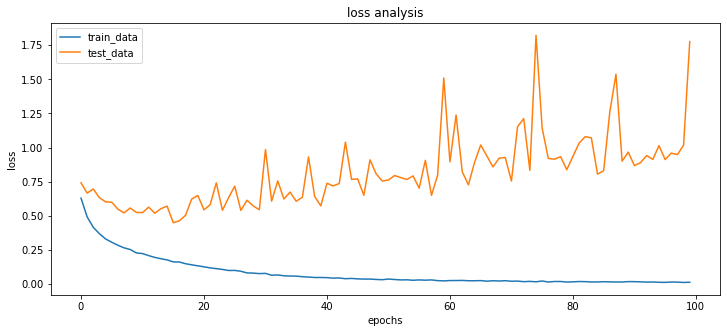

In [21]:
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_data','test_data'])
plt.title('loss analysis')
plt.show()

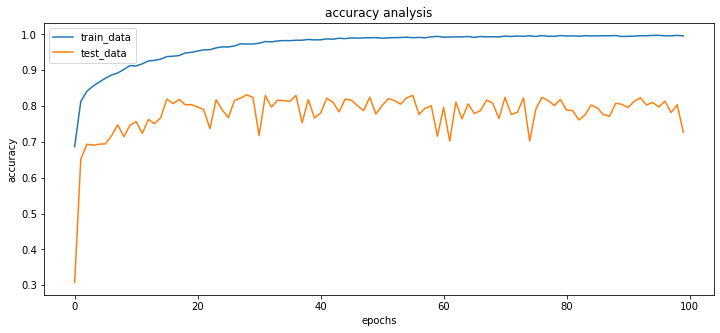

In [22]:
plt.figure(figsize=(12,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_data','test_data'])
plt.title('accuracy analysis')
plt.show()



In [23]:
IMG = Image.open('../input/breast-histopathology-images/10253/0/10253_idx5_x1001_y1101_class0.png')
print(type(IMG))
IMG = IMG.resize((100, 100))
IMG = np.array(IMG)
print('po array = {}'.format(IMG.shape))
IMG = np.true_divide(IMG, 255)
IMG = IMG.reshape(-1,100, 100,3)
print(type(IMG), IMG.shape)
predictions = model.predict_classes(IMG)
print(model)
predictions_c = model.predict_classes(IMG)
print(predictions, predictions_c)
model.predict_classes(IMG)
model.predict(IMG)
print(predictions_c)

<class 'PIL.PngImagePlugin.PngImageFile'>
po array = (100, 100, 3)
<class 'numpy.ndarray'> (1, 100, 100, 3)
[0] [0]
[0]


In [24]:
classes = {'TRAIN': ['Non Malignant (No Cancer)','Malignant'],
           'TEST': ['Non Malignant (No Cancer)','Malignant']}

predicted_class = classes['TRAIN'][predictions_c[0]]
print('We think that is {}.'.format(predicted_class.lower()))

We think that is non malignant (no cancer).


In [25]:
# Save the Model Weights
model.save_weights('_model_.h5')

# Save the Model to JSON
model_json = model.to_json()
with open('_model_.json', 'w') as json_file:
    json_file.write(model_json)
    
print('Model saved to the disk.')

Model saved to the disk.
